<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
import chart_studio.plotly as cs
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
#import scattertext as st
import spacy
from pprint import pprint

Loading BokehJS ...

In [2]:
import pandas as pd
import unicodedata
df = pd.read_csv('wiki_data.csv', encoding = 'utf8')
df['Statements'] = (df['Statements'].map(lambda x: unicodedata.normalize('NFKD', str(x))))

df.head()

df.head()

,Statements,label
0,"The close similarities between measles virus, ...",1
1,Although the main weapon used was vaccinia vir...,1
2,Other coronaviruses were known to cause mild i...,1
3,"Some zoonotic infections are often ""dead ends""...",1
4,Microorganisms constitute more than 90 per cen...,1


,Statements,label
0,"The close similarities between measles virus, ...",1
1,Although the main weapon used was vaccinia vir...,1
2,Other coronaviruses were known to cause mild i...,1
3,"Some zoonotic infections are often ""dead ends""...",1
4,Microorganisms constitute more than 90 per cen...,1


In [3]:
df.shape

(19998, 2)

In [4]:
df.head()

,Statements,label
0,"The close similarities between measles virus, ...",1
1,Although the main weapon used was vaccinia vir...,1
2,Other coronaviruses were known to cause mild i...,1
3,"Some zoonotic infections are often ""dead ends""...",1
4,Microorganisms constitute more than 90 per cen...,1


In [5]:
# Top unigrams before removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

the 105158
of 48216
and 45141
in 37277
to 31820
was 15730
as 12512
for 10969
by 10823
that 10317
is 10138
with 9921
on 9882
his 9781
he 8566
from 7342
it 6667
at 6185
an 5484
were 4942


In [6]:
# Top unigrams after removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

new 2324
war 1997
time 1896
later 1679
world 1530
years 1511
game 1454
known 1365
united 1344
including 1341
year 1280
states 1259
series 1174
american 1152
city 1132
film 1132
used 1127
state 1113
second 1103
early 1090


In [7]:
#  Top bigrams before removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

of the 15033
in the 10075
to the 4899
and the 4091
on the 3130
for the 2801
by the 2667
at the 2456
with the 2314
from the 2139
as the 2015
the first 1861
to be 1608
that the 1511
he was 1439
it was 1421
during the 1404
of his 1308
one of 1285
it is 1136


In [8]:
df3.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [9]:
# Top bigrams after removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

united states 988
world war 589
new york 388
war ii 240
united kingdom 203
19th century 195
20th century 184
los angeles 168
north america 156
science fiction 155
following year 145
took place 143
air force 141
video game 136
second world 126
years later 125
new zealand 125
civil war 124
prime minister 113
best known 107


In [10]:
df4.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

In [11]:
# Top trigrams before removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

one of the 836
the united states 791
as well as 526
part of the 465
the end of 403
in the united 349
known as the 315
the battle of 315
end of the 291
at the time 239
as part of 233
world war ii 230
such as the 223
member of the 213
most of the 205
the united kingdom 197
of the united 195
was the first 187
in the early 181
as one of 178


In [12]:
df5.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

In [13]:
# Top trigrams after removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

world war ii 230
second world war 120
new south wales 83
new york city 76
million years ago 49
new york times 45
united states army 44
united states navy 42
video game developed 42
australian air force 40
late 19th century 40
royal australian air 39
early 20th century 38
international union conservation 34
union conservation nature 34
outbreak world war 33
air force raaf 33
president united states 31
atlantic hurricane season 31
studio album american 31


In [14]:
df6.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

In [15]:
df6.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

In [16]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [17]:
blob = TextBlob(str(df['Statements']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for Statements corpus')

In [18]:
df['Sentence_length'] = df['Statements'].astype(str).apply(len)
df['word_count'] = df['Statements'].apply(lambda x: len(str(x).split()))

In [19]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Sentence_length',
    linecolor='black',
    yTitle='word_count',
    title='Text Length Distribution')

In [20]:
# Topic Modeling 
reindexed_data = df['Statements']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [21]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [22]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [23]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [24]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [25]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  new war time
Topic 2:  game games best
Topic 3:  war battle game
Topic 4:  album film band
Topic 5:  hurricane season tropical
Topic 6:  team league football


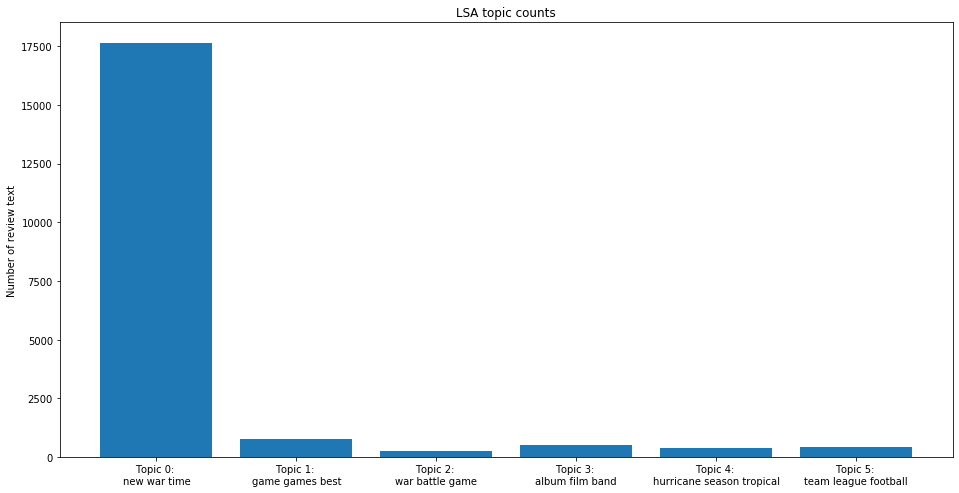

In [26]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [27]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19998 samples in 0.034s...
[t-SNE] Computed neighbors for 19998 samples in 1.810s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19998
[t-SNE] Computed conditional probabilities for sample 2000 / 19998
[t-SNE] Computed conditional probabilities for sample 3000 / 19998
[t-SNE] Computed conditional probabilities for sample 4000 / 19998
[t-SNE] Computed conditional probabilities for sample 5000 / 19998
[t-SNE] Computed conditional probabilities for sample 6000 / 19998
[t-SNE] Computed conditional probabilities for sample 7000 / 19998
[t-SNE] Computed conditional probabilities for sample 8000 / 19998
[t-SNE] Computed conditional probabilities for sample 9000 / 19998
[t-SNE] Computed conditional probabilities for sample 10000 / 19998
[t-SNE] Computed conditional probabilities for sample 11000 / 19998
[t-SNE] Computed conditional probabilities for sample 12000 / 19998
[t-SNE] Computed conditional probabilities for sa

In [28]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [29]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [30]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

GlyphRenderer(id='1038', ...)